In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# load data
df = pd.read_csv('/Users/macbook/Desktop/BARRYMAC/data analysis/data_jobs.csv')

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

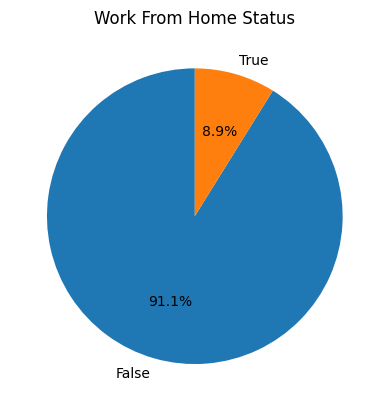

In [3]:
df['job_work_from_home'].value_counts().plot(kind= 'pie', startangle = 90,autopct ='%1.1f%%')
plt.title('Work From Home Status')
plt.ylabel('')
plt.show()

In [4]:
# df['job_title_short'].value_counts().plot(kind= 'pie')
# plt.title('Work From Home Status')
# plt.ylabel('')
# plt.show()

In [5]:
df[['job_work_from_home', 'job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


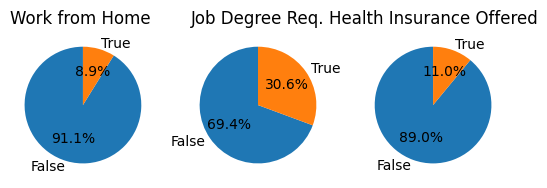

In [6]:
fig, ax = plt.subplots(1,3)
dict_column = {
    'job_work_from_home': 'Work from Home ',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}
for i, (column, title) in enumerate(dict_column.items()):
    # print(i, column, title)
    ax[i].pie(df[column].value_counts(),startangle = 90,autopct ='%1.1f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

plt.show() 

In [7]:
df = df[df['job_title_short']=='Data Analyst']

In [13]:
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary = ('salary_year_avg', 'median'),
)
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


In [10]:
!pip install adjustText


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


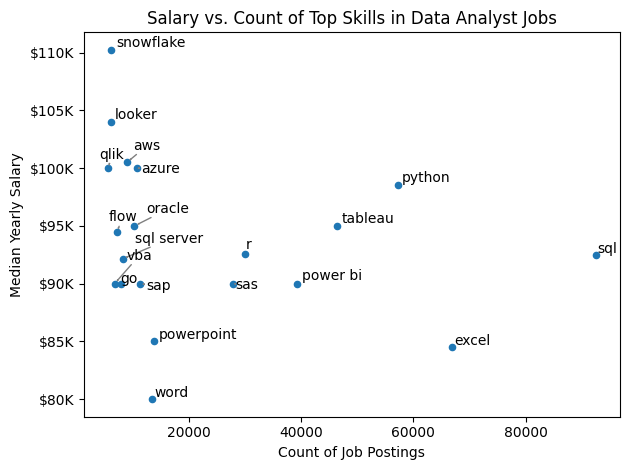

In [20]:
from adjustText import adjust_text
skill_stats.plot(kind='scatter',x = 'skill_count', y = 'median_salary')

# for i, txt in enumerate(skill_stats.index):
#     plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))
    
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

plt.tight_layout()
plt.show()